# PRIMEROS PASOS CON TITANIC DATASET
### Importamos nuestras principales dependencias

In [74]:
# Principales dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# Importamos algunos algoritmos de clasificación
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [76]:
# Una posible forma para evaluar nuestro modelo
from sklearn.metrics import accuracy_score

#### Tratamos de entender el problema

In [77]:
# http://www.kaggle.com/c/titanic
# Ya explicado en el manual

#### Obtención de datos

In [78]:
# "/home/danzaga/MasterBD/Leccion4/train.csv"

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Borro la columna PassengerID

In [79]:
df = df.drop('PassengerId', axis=1)

# Explotory Data Analysis (EDA)

In [80]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [82]:
len(df)

891

In [83]:
df.shape

(891, 11)

In [84]:
# faltan algunas columnas dado que son strings.
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [85]:
# y aqui vemos cuentas columnas tienen valores que faltan.
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [86]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [87]:
# Los "nan" significan que el dato no fue documentado
for cabina in df.Cabin:
    print(cabina)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Quiero ver el número aproximado de personas que sobrevivieron

In [89]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

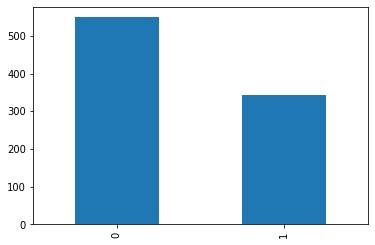

In [90]:
df.Survived.value_counts().plot(kind="bar")
plt.show()

# ¿Cómo seleccionar información concreta de nuestro dataset?

## forma 1 de seleccionar información correcta

In [91]:
df["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

### forma 2 de selccionar información concretra

In [92]:
df.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

### forma 3 de selccionar información concretra: crosstab

In [93]:
pd.crosstab(df.Sex, df.Sex)

Sex,female,male
Sex,,
female,314,0
male,0,577


In [94]:
# Haciendo otra prueba
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


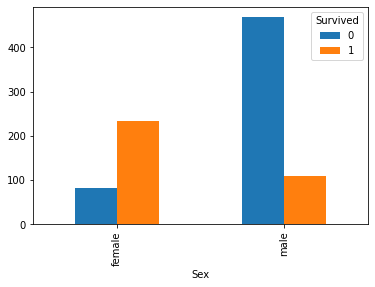

In [95]:
pd.crosstab(df.Sex, df.Survived).plot(kind="bar")
plt.show()

### Conclusión la mayoría de hombres murieron

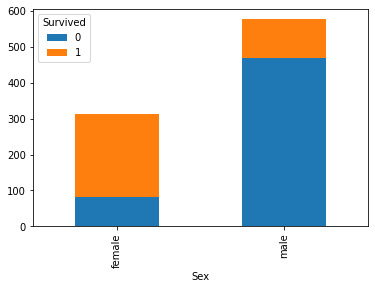

In [96]:
# otra forma de visualizarlo
pd.crosstab(df.Sex, df.Survived).plot(kind="bar", stacked=True)
plt.show()

In [97]:
pd.crosstab(df.Pclass, df.Survived)

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


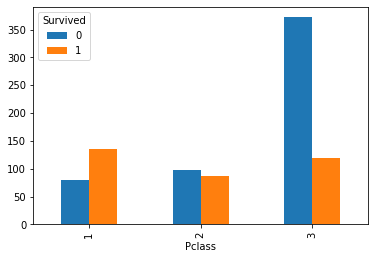

In [98]:
pd.crosstab(df.Pclass, df.Survived).plot(kind="bar")
plt.show()

### Conclusión la mayoría de personas de tercera clase murieron

# Forma 5 de seleccionar información concreta: groupby()

In [99]:
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

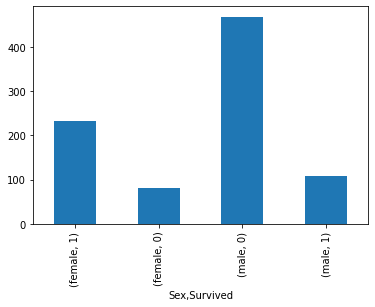

In [100]:
df.groupby("Sex").Survived.value_counts().plot(kind="bar")
plt.show()

# Forma 6 de seleccionar información concreta

In [101]:
df_sex_uno = df[df.Pclass==1]
df_sex_uno.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [102]:
# selecciono
df_sex_uno_crosstab = df[df.Pclass==1]["Survived"]
df_sex_uno_crosstab

1      1
3      1
6      0
11     1
23     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 216, dtype: int64

# Creando nuevos DataFrames

### Ejemplos de creación de dataframes concretos

In [103]:
# supervivencia a 1 --> todos los que sobreviven
df_sobreviven_todos = df[df['Survived']==1]
# supervivencia a 0 --> todos los que  no sobreviven
df_sobreviven_ninguno = df[df['Survived']==0]
# supervivencia a 1 - sex = hombre --> hombres que sobreviven
hombres_supervivientes = df[(df['Survived']==1) & (df["Sex"]=="male")]
# supervivencia a 1 - sex = mujer --> mujeres que sobreviven
mujeres_supervivientes = df[(df['Survived']==1) & (df["Sex"]=="female")]
# supervivencia a 0 - sex = hombre --> hombres que no sobreviven
hombres_no_supervivientes = df[(df['Survived']==0) & (df["Sex"]=="male")]
# supervivencia a 0 - sex = mujer --> mujeres que no sobreviven
mujeres_no_supervivientes = df[(df['Survived']==0) & (df["Sex"]=="female")]

In [104]:
# probamos...

In [105]:
df_sobreviven_todos.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [106]:
df_sobreviven_todos.Survived.value_counts(3)

1    1.0
Name: Survived, dtype: float64

In [107]:
df_sobreviven_ninguno.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [108]:
hombres_supervivientes.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0,NaN,S
21,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0,D56,S
23,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5,A6,S


In [109]:
mujeres_supervivientes.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [110]:
hombres_no_supervivientes.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [111]:
hombres_no_supervivientes.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Obtención de la información de los gráficos

### Obtenemos información de los gráficos
### Función para hacer gráficas de forma automática

In [112]:
df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


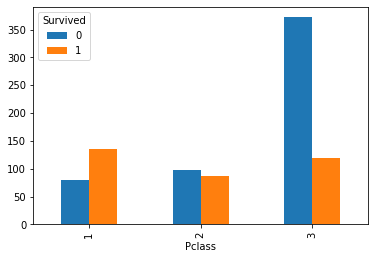

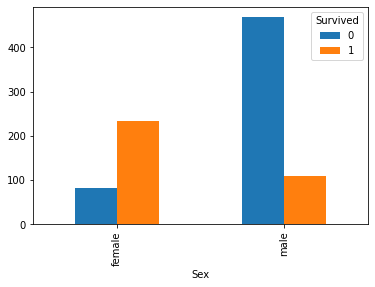

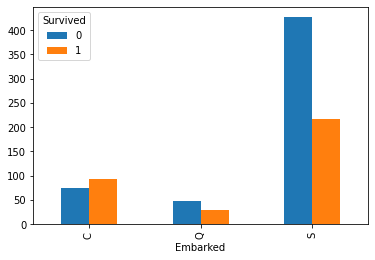

In [113]:
# pd.crosstab(df["Sex"], df.Survived)

opciones = ["Pclass", "Sex", "Embarked"]

for opcion in opciones:
        pd.crosstab(df[opcion], df.Survived).plot(kind="bar")
        plt.show()

### Algunos Gráficos de Seaborn

In [114]:
# UserWarning: The 'factorplot' fuction has been renamed to 'catplot'
# The original name will be removed in a future release
sns.factorplot('Sex', 'Survived', hue='Pclass', kind="strip", data=df)
plt.show()

AttributeError: module 'seaborn' has no attribute 'factorplot'

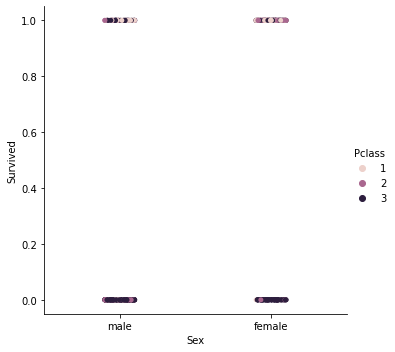

In [115]:
# https://seaborn.pydata.org/generated(seaborn.catplot.html)
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind="strip", data=df)
plt.show()

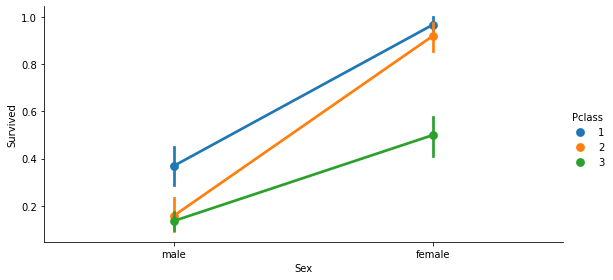

In [116]:
sns.catplot(x='Sex', y='Survived', hue='Pclass', kind="point", height=4, aspect=2, data=df)
plt.show()

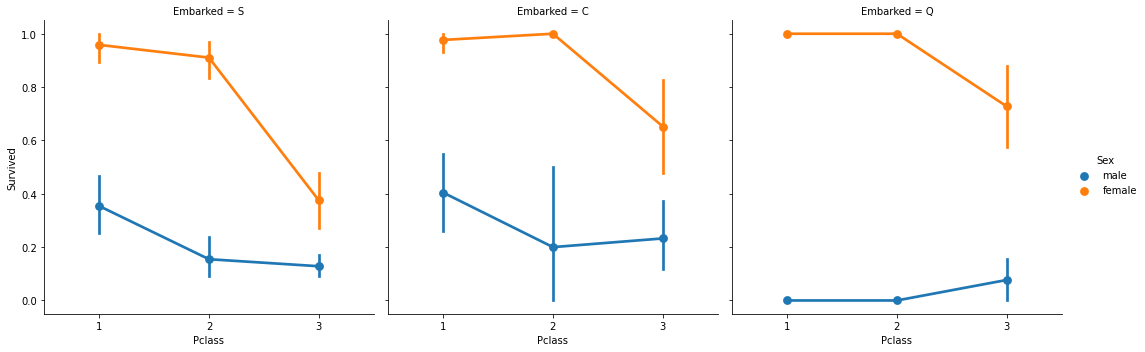

In [117]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', kind="point", data=df)
plt.show()

# Edad y supervivencia

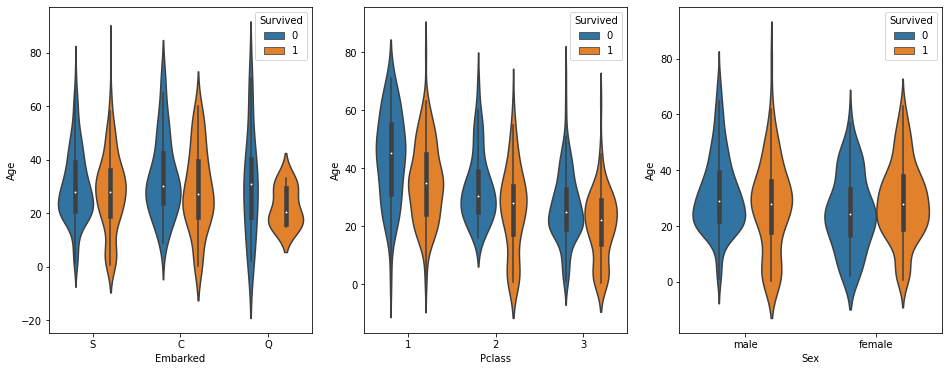

In [118]:
# me creo una figura
fig = plt.figure(figsize=(16,6))
# 3 subplots
# 1 fila 3 columnas - gráfica 1
ax1 = fig.add_subplot(131)
# 1 fila 3 columnas - gráfico 2
ax2 = fig.add_subplot(132)
# 1 fila 3 columnas - gráfico 3
ax3 = fig.add_subplot(133)

# violinplot
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, ax=ax3)

plt.show()

### Hago un split=True para que me lo haga más visual

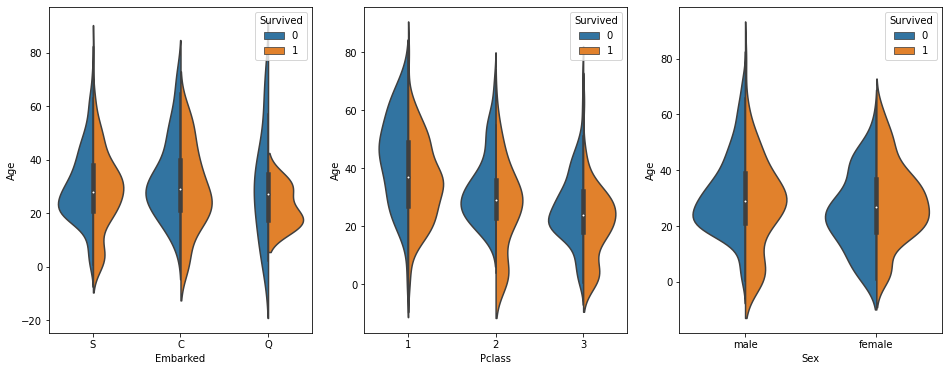

In [119]:
# me creo una figura
fig = plt.figure(figsize=(16,6))
# 3 subplots
# 1 fila 3 columnas - gráfica 1
ax1 = fig.add_subplot(131)
# 1 fila 3 columnas - gráfico 2
ax2 = fig.add_subplot(132)
# 1 fila 3 columnas - gráfico 3
ax3 = fig.add_subplot(133)

# violinplot
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax3)

plt.show()

In [120]:
df.Age.describe()
# min = 0.42
# max = 80

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## heatmap

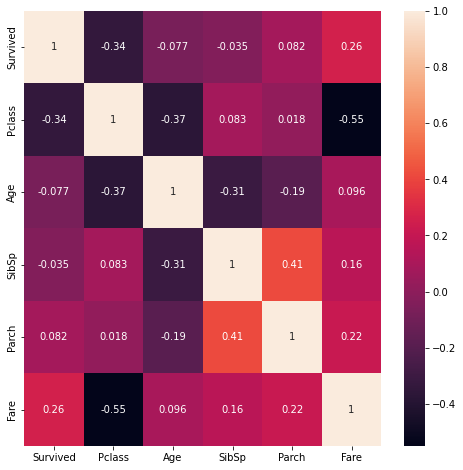

In [121]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

## barplot

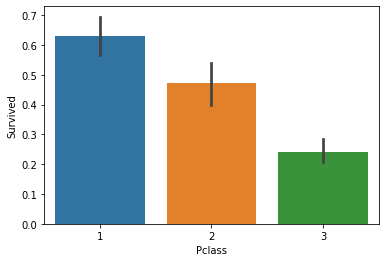

In [122]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.show()

In [123]:
def funcion_graficas(feat):
    plt.subplot(2,1,1)
    df.groupby(feat).Survived.value_counts().plot(kind="bar")
    plt.figure(figsize=(12,8))
    plt.subplot(2,1,2)
    sns.barplot(x=feat, y="Survived", data=df)
    plt.show()

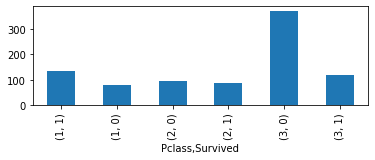

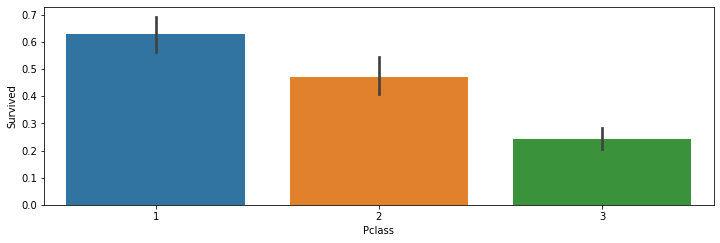

In [124]:
funcion_graficas("Pclass")

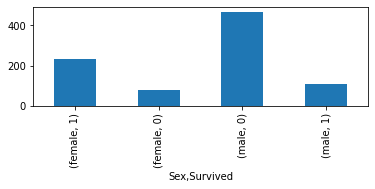

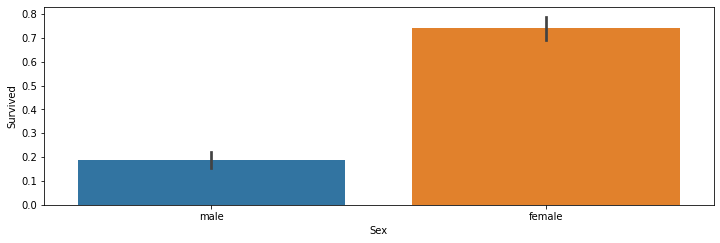

In [125]:
funcion_graficas("Sex")

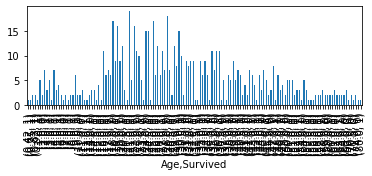

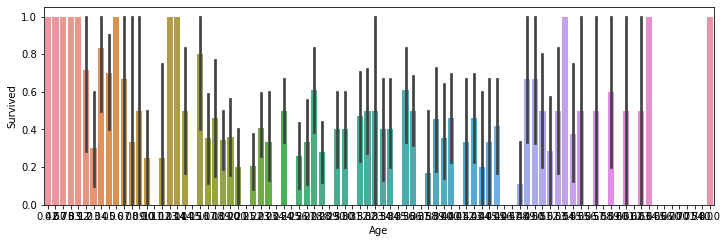

In [126]:
funcion_graficas("Age")

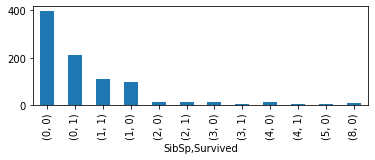

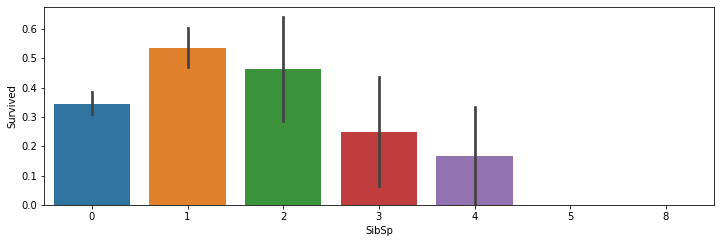

In [127]:
funcion_graficas("SibSp")

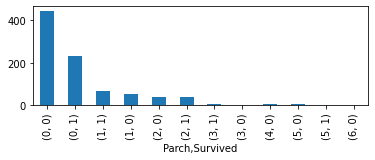

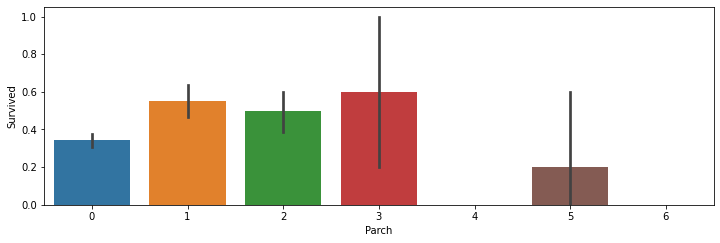

In [128]:
funcion_graficas("Parch")

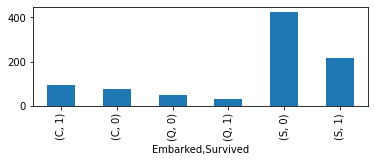

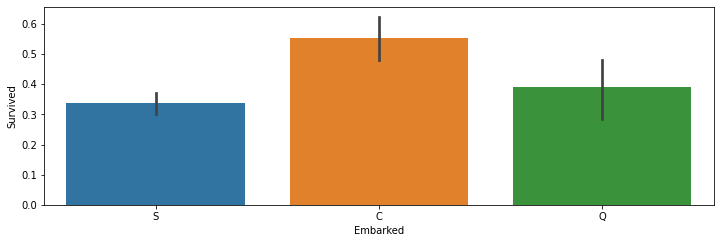

In [129]:
funcion_graficas("Embarked")

In [130]:
# Ahora se podrían sacar algunas conclusiones más

# por el momento es suficiente!

# Pregunta -1-
### Si estás trabajando con un set de datos, y necesitas ver rápidamente la información de una columna con un gráfico. 
### ¿Qué librería usarías? ¿Por qué?

#### Seaborn, de todas las que aprendí me resulto la más rápida dado que usa menos líneas de código.

# Pregunta -2-
### ¿Te parece difícil la forma en que creamos “nuevos DataFrames”?
### (seleccionando solo ciertas filas o columnas, bajo ciertas condiciones o premisas).

#### Me resulta sencillo, aunque no todos, diría que depende del DataFrames y los datos a visualizar cambia la dificultad del mismo.

#### Cuando intento crear nuevos DataFrames por mi cuenta me resulta de ayuda entender primero el mismo, con comandos como info(),describe(), crosstab()... para enteder bien como emparejar los datos que quiero mostrar

# Pregunta -3-
### Busca algo de información acerca de “Heatmap” y explica con tus palabras lo que consideres oportuno
### Puedes añadir ejemplos o lo que quieras.

#### El heatmap se basa en guardar información sobre el puntero del ratón, esto sirve para obtener datos de usuarios sobre la web que visitó, por ejemplo se puede saber si el boton del "carrito" es visible o np, también si un usuario esta pensando comprar o no un producto y muchas más utilidades, eso me pareció entender.

In [131]:
ventas = pd.DataFrame(
    np.random.randint(1, 100, 120).reshape(12, 10),
    columns = np.arange(2009, 2019),
    index = ["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep", "oct", "nov", "dic"]
)

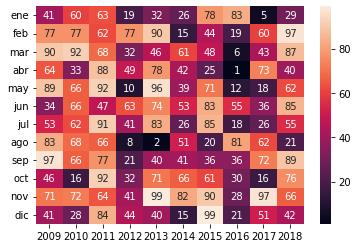

In [132]:
ax = sns.heatmap(ventas, annot = True);

# Pregunta -4-
### Hemos usado diferentes tipos de gráficos.
### ¿Se entiende bien cuando usar un “violinplot” o un “factorplot” por ejemplo?
### ¿Serías capaz de emplearlo en otro set de datos?

### Me resulta complejo entender cual usar, creo que daria uso a "violinplot" para ver la densidad de los datos y valores como la media, mediana, máximo, mínimo, pero factorplot no lo tengo tan claro supongo que tendrá su utilidad pero me resulta más completo "violinplot", me parece que los dos tiene una utilidad parecida.

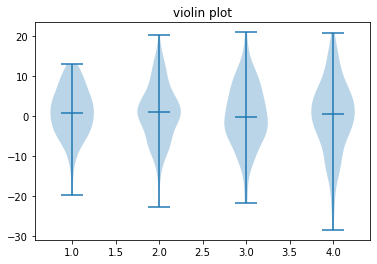

In [133]:
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# grafico de violin, se puede activar la visualizacion de la media y de la mediana
plt.violinplot(all_data, showmeans=False, showmedians=True)
plt.title('violin plot');


In [134]:
# Gráfico de violin(largo del sépalo/especies - IrisDataset)
df = sns.load_dataset('iris')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


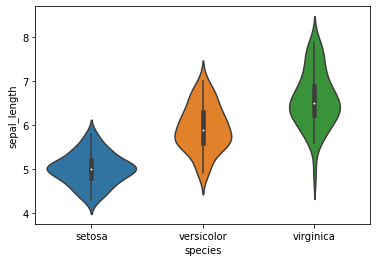

In [135]:
vars = df.columns.values.tolist()
vars

sns.violinplot(x='species', y=df[vars[0]], data=df)
plt.ylabel(vars[0])
plt.show()